In [1]:
#Importing Modules

import os
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import math



In [2]:
#Reading Data and Preprocessing

Cute = pd.read_csv('C:\Piazza\CUTe2\Retail_Train.csv')

retail = Cute.copy()
retail = retail.drop(labels='PersonID',axis=1)
retail['totalVisits'] = retail['DirectVisits'] + retail['OnlineVisits']
retail_new = retail.drop(labels=['OnlineVisits', 'DirectVisits'],axis=1)


retail_new['FamilySize'] = retail_new['FamilySize'].astype('object')
retail_new['TransactionMode'] = retail_new['TransactionMode'].astype('object')
retail_new['Occupation'] = retail_new['Occupation'].astype('object')

retail_new1 = pd.get_dummies(retail_new)

# Understanding the Data

In [3]:
list1= []
list2= []
list3= []
list4= []
list5= []
list6= []
list7= []
list8= []
list9= []
for i in Cute['Amount']:
    if i <= 2500:
        list1.append(i)
    elif 2501 <=i<= 5000:
        list2.append(i)
    elif 5001 <=i<= 7500:
        list3.append(i)
    elif 7501 <=i<= 10000:
        list4.append(i)
    elif 10000 <=i<= 12500:
        list5.append(i)
    elif 12501 <=i<= 15000:
        list6.append(i)
    elif 15001 <=i<= 17500:
        list7.append(i)
    elif 17501 <=i<= 20000:
        list8.append(i)
    else:
        list9.append(i)
print(len(list1))
print(len(list2))
print(len(list3))
print(len(list4))
print(len(list5))
print(len(list6))
print(len(list7))
print(len(list8))
print(len(list9))


84
2212
457
113
43
16
7
5
1


# Visulisation

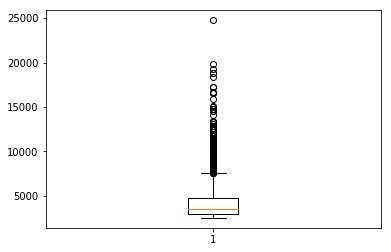

In [4]:
plt.boxplot(Cute.Amount)
plt.show()

count     2938.000000
mean      4209.432267
std       2069.917106
min       2500.000000
25%       2897.250000
50%       3512.000000
75%       4772.500000
max      24764.000000
Name: Amount, dtype: float64
4209.432266848196
3512.0
0    2500
1    2625
dtype: int64


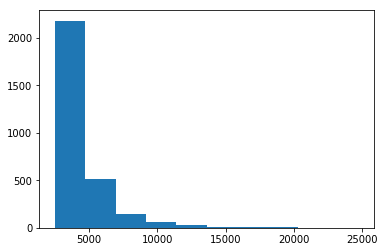

In [5]:
print(Cute.Amount.describe())
print(Cute.Amount.mean())
print(Cute.Amount.median())
print(Cute.Amount.mode())
plt.hist(Cute.Amount)
plt.show()

In [6]:
list11 = Cute.Amount.sort_values(ascending=True).tolist()
list11[2879]

10525

# Linear Regression

In [19]:
X = retail_new1.loc[:, retail_new1.columns != 'Amount']
Y = retail_new1[['Amount']]

trainX,testX,trainY,testY = train_test_split(X,Y, test_size=0.3, random_state = 42)


lm1 = LinearRegression()
lm1.fit(trainX , trainY)


y_pred = lm1.predict(testX)


print(math.sqrt(mean_squared_error(testY , y_pred)))
print(r2_score(testY , y_pred))



1191.6923998636303
0.722917753232


# Linear Regression with PCA

In [20]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline

pipeline = Pipeline([('scaling', StandardScaler()), ('pca', PCA(n_components=3))])

pca_train = pipeline.fit_transform(trainX)
pca_test = pipeline.fit_transform(testX)

lm = LinearRegression()
lm.fit(pca_train,trainY)
y_pred = lm.predict(pca_test)


print(math.sqrt(mean_squared_error(testY , y_pred)))
print(r2_score(testY , y_pred))


1893.9768722288075
0.300110135653


# Linear Regression with Lasso

In [22]:
from sklearn import linear_model
clf = linear_model.Lasso(alpha=0.1)

clf.fit(trainX, trainY)
print(clf.coef_)

Y_cap  = clf.predict(testX)

print('\n')
print(math.sqrt(mean_squared_error(testY , Y_cap)))

print(r2_score(testY , Y_cap))

[ -6.37381556e+00  -4.19737021e-01   4.37770484e-02  -2.69640998e+02
   2.34912108e+02  -1.17327241e+02  -1.09767019e+00   1.24467669e+00
  -1.98571179e+02   1.04405503e+02   3.45440835e+02   9.19382692e+02
  -8.70851855e+02   1.13620069e+03  -6.35110847e+02  -3.47145646e+02
   5.59884342e-13  -2.28319857e+02   0.00000000e+00   0.00000000e+00
  -1.32727928e+01   2.18596533e+01]


1189.8626377246287
0.723767981658


# Linear Regression with Ridge

In [23]:
ridge = linear_model.Ridge(alpha = 0.1)
ridge.fit(trainX , trainY)
print(ridge.coef_)

Y_caps  = ridge.predict(testX)

print('\n')
print(math.sqrt(mean_squared_error(testY , Y_caps)))

print(r2_score(testY , Y_caps))

[[ -6.35818879e+00  -4.18857188e-01   4.36710652e-02  -2.69653319e+02
    2.34909582e+02  -1.74961032e+02  -5.85399224e+01  -5.54218651e+01
   -2.57253881e+02   5.33258897e+01   3.10171901e+02   9.19660972e+02
   -1.03122084e+03   1.11044042e+03  -8.16201651e+02  -1.73663500e+02
    1.73663500e+02  -1.14475450e+02   1.14475450e+02  -3.15280482e+00
   -1.62642938e+01   1.94170986e+01]]


1190.8114360315362
0.723327270339


# Replacing Outliers With 95 Percentile (values > 12500)

In [24]:
Cute['Amount'] = Cute.Amount.where(Cute.Amount < 12500, 8000)

# Model Building After Replacing Outliers

In [ ]:
retail2 = Cute.copy()
retail2 = retail.drop(labels='PersonID',axis=1)
retail2['totalVisits'] = retail2['DirectVisits'] + retail2['OnlineVisits']
retail2_new = retail2.drop(labels=['OnlineVisits', 'DirectVisits'],axis=1)


retail2_new['FamilySize'] = retail2_new['FamilySize'].astype('object')
retail2_new['TransactionMode'] = retail2_new['TransactionMode'].astype('object')
retail2_new['Occupation'] = retail2_new['Occupation'].astype('object')

retail2_new1 = pd.get_dummies(retail2_new)

In [25]:
list_1= []
list_2= []
list_3= []
list_4= []
list_5= []
list_6= []
list_7= []
list_8= []
list_9= []
for i in Cute['Amount']:
    if i <= 2500:
        list_1.append(i)
    elif 2501 <=i<= 5000:
        list_2.append(i)
    elif 5001 <=i<= 7500:
        list_3.append(i)
    elif 7501 <=i<= 10000:
        list_4.append(i)
    elif 10000 <=i<= 12500:
        list_5.append(i)
    elif 12501 <=i<= 15000:
        list_6.append(i)
    elif 15001 <=i<= 17500:
        list_7.append(i)
    elif 17501 <=i<= 20000:
        list_8.append(i)
    else:
        list_9.append(i)
print(len(list_1))
print(len(list_2))
print(len(list_3))
print(len(list_4))
print(len(list_5))
print(len(list_6))
print(len(list_7))
print(len(list_8))
print(len(list_9))

84
2212
457
142
43
0
0
0
0


In [ ]:
# Visulisation

plt.boxplot(Cute.Amount)
plt.show()

print(Cute.Amount.describe())
print(Cute.Amount.mean())
print(Cute.Amount.median())
print(Cute.Amount.mode())
plt.hist(Cute.Amount)
plt.show()

list11 = Cute.Amount.sort_values(ascending=True).tolist()
list11[2879]

# Linear Regression

X = retail2_new1.loc[:, retail2_new1.columns != 'Amount']
Y = retail2_new1[['Amount']]

trainX,testX,trainY,testY = train_test_split(X,Y, test_size=0.3, random_state = 42)


lm2 = LinearRegression()
lm2.fit(trainX , trainY)


y_pred1 = lm2.predict(testX)


print(math.sqrt(mean_squared_error(testY , y_pred1)))
print(r2_score(testY , y_pred1))



# Linear Regression with PCA

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline

pipeline = Pipeline([('scaling', StandardScaler()), ('pca', PCA(n_components=3))])

pca_train1 = pipeline.fit_transform(trainX)
pca_test1 = pipeline.fit_transform(testX)

lr_pca = LinearRegression()
lr_pca .fit(pca_train1,trainY)
y_pred3 = lr_pca.predict(pca_test1)


print(math.sqrt(mean_squared_error(testY , y_pred)))
print(r2_score(testY , y_pred))


# Linear Regression with Lasso

from sklearn import linear_model
clf = linear_model.Lasso(alpha=0.1)

clf.fit(trainX, trainY)
print(clf.coef_)

Y_cap  = clf.predict(testX)

print('\n')
print(math.sqrt(mean_squared_error(testY , Y_cap)))

print(r2_score(testY , Y_cap))

# Linear Regression with Ridge

ridge = linear_model.Ridge(alpha = 0.1)
ridge.fit(trainX , trainY)
print(ridge.coef_)

Y_caps  = ridge.predict(testX)

print('\n')
print(math.sqrt(mean_squared_error(testY , Y_caps)))

print(r2_score(testY , Y_caps))2

72496.504822721457

0.98539639707400706

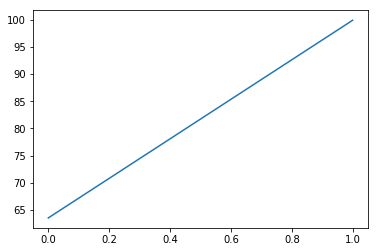